In [4]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px

In [7]:
%run ../../modules/utils.ipynb
%run ../../modules/cds.ipynb
%run ../../modules/preprocessing.ipynb

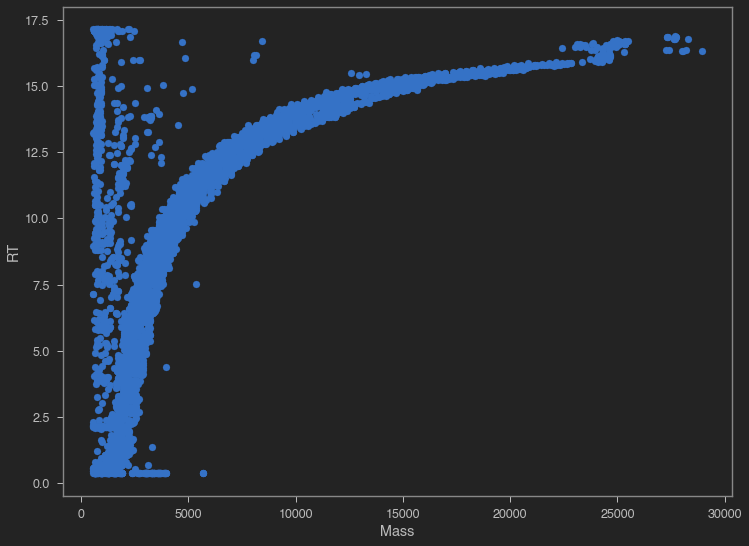

In [414]:
df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724_std.xlsx')
# plot_zone(df_phe)
# plt.savefig('/Users/bryan/Downloads/tRNA_Phe_Thermo_Fisher_result_WL_20200916.png', transparent=True)

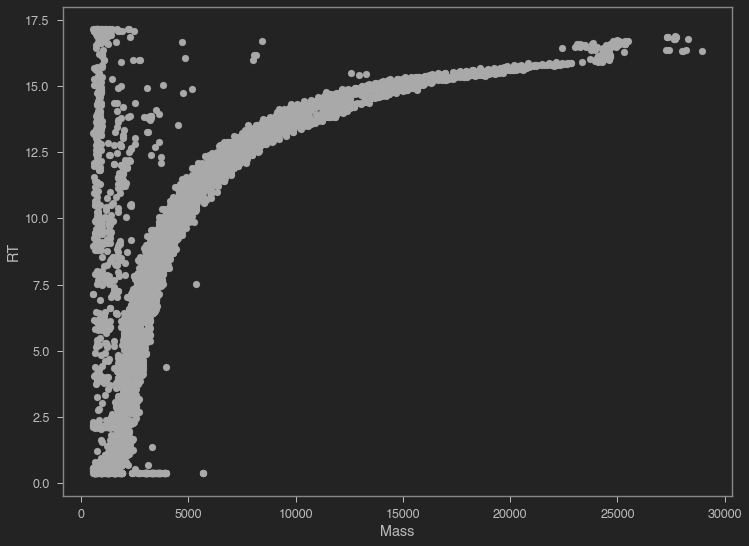

In [450]:
plt.figure(figsize=(12, 9))
plt.xlabel('Mass')
plt.ylabel('RT')
plt.scatter(df_phe.Mass, df_phe.RT, color='darkgray')

In [415]:
df_phe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5933 entries, 0 to 5932
Data columns (total 4 columns):
Unnamed: 0    5933 non-null int64
Mass          5933 non-null float64
RT            5933 non-null float64
Vol           5933 non-null float64
dtypes: float64(3), int64(1)
memory usage: 185.5 KB


In [416]:
df_phe_big = df_phe[df_phe.Mass>22000].sort_values('Vol', ascending=False)[:10][['Mass', 'Vol', 'RT']]
df_phe_big # 2

,Mass,Vol,RT
5833,24252.311092,67449456.40,15.979698
5857,24581.380920,41918736.85,16.014392
5836,24280.305501,7527536.79,15.979698
5822,24087.242612,5613045.73,15.979698
5835,24268.303777,5195981.25,16.014392
5834,24267.306460,4921316.68,15.910278
5860,24596.356603,3689956.25,16.049153
5819,24027.244899,3460015.41,16.049153
5861,24597.353308,3340775.80,16.014392
5899,25334.568757,3153675.69,16.610561


24581.380920434
df3 226 df5 226


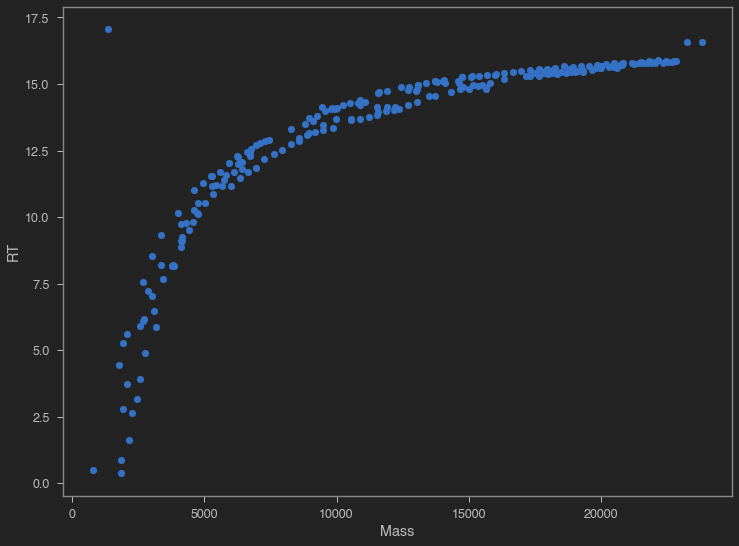

In [417]:
full_mass = df_phe_big.iloc[1].Mass
print(full_mass)
df_ms, _ = computational_data_seperation(df_phe, df_phe, full_mass=full_mass, ignore_endpoints=True)
df_ms.shape
plot_zone(df_ms)

mass_x (226,) mass_y (226,)
df3_idxs 18 df5_idxs 18
df3_idxs 23 df5_idxs 23
df3_idxs 24 df5_idxs 24
df3_idxs 29 df5_idxs 28
df3_idxs 8 df5_idxs 8
df3_idxs 3 df5_idxs 3
df3_idxs 6 df5_idxs 6
df3_idxs 2 df5_idxs 2
df3_idxs 2 df5_idxs 2
df3_idxs 4 df5_idxs 4
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0
df3_idxs 0 df5_idxs 0
df3_idxs 7 df5_idxs 7
df3_idxs 8 df5_idxs 8


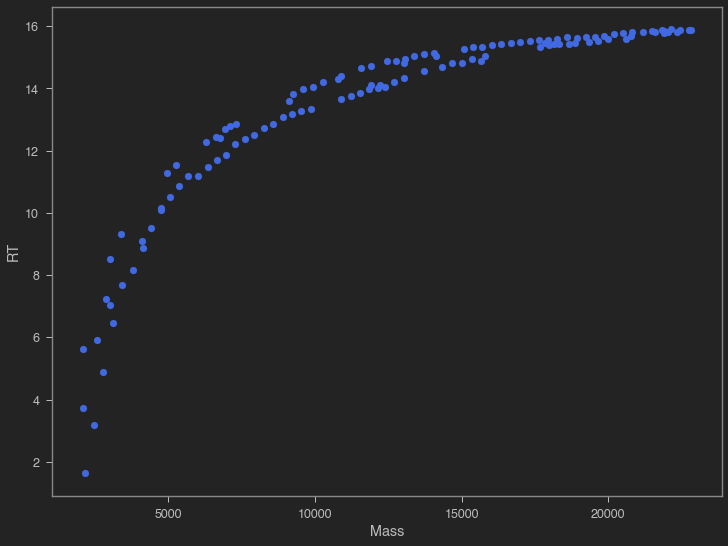

In [453]:
df_ms_bcr, mass_pairs = base_calling_random(df_ms)
df_ms_bcr.shape, len(mass_pairs)
# plot_basecalling(df_ms_bcr, mass_pairs, annotate=False)
mass_3p = [pair[0] for pair in mass_pairs]
mass_5p = [pair[1] for pair in mass_pairs]
mass_3p5p = set(mass_3p) & set(mass_3p)
mass_3ponly = set(mass_3p) - set(mass_5p)
mass_5ponly = set(mass_5p) - set(mass_3p)
mass_else = mass_3ponly | mass_5ponly
len(mass_3p5p), len(mass_else)

df_skeleton = df_ms_bcr[df_ms_bcr.Mass.isin(mass_3p5p)]
# plot_zone(df_skeleton)
plt.figure(figsize=(12, 9))
plt.xlabel('Mass')
plt.ylabel('RT')
plt.scatter(df_skeleton.Mass, df_skeleton.RT, color='royalblue')

In [3]:
df_phe_3p = pd.read_csv('/Users/bryan/Studio/tools/tRNA-Phe_3p.csv')
df_phe_5p = pd.read_csv('/Users/bryan/Studio/tools/tRNA-Phe_5p_nogap.csv')

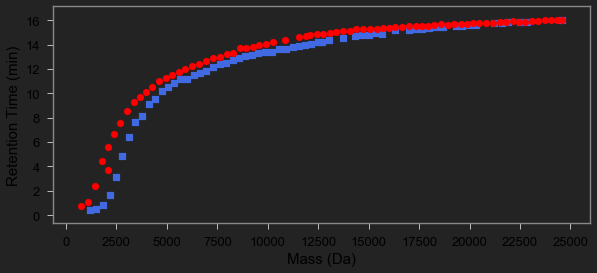

In [42]:
fig = plt.figure(figsize=(8.5, 4))
plt.xlabel('Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
plt.yticks(range(0, 17, 2), fontname="Arial", size=13, color='black')
# plt.rc('xtick', labelsize=13) 
# plt.rc('ytick', labelsize=13)
# plt.rc('axes', titlesize=15)
# plt.rc('axes', labelsize=18)
# plt.scatter(df_phe.Mass, df_phe.RT, color='navy')
plt.scatter(df_phe_3p.Mass, df_phe_3p.RT, color='royalblue', marker='s')
plt.scatter(df_phe_5p.Mass, df_phe_5p.RT, color='red')
# plt.scatter(df_skeleton.Mass, df_skeleton.RT, color='royalblue')
# plt.scatter(df_phe_big.iloc[1].Mass, df_phe_big.iloc[1].RT, color='royalblue')
fig.tight_layout()
plt.savefig('/Users/bryan/Downloads/tRNA_phe_ladders_sep28.svg', transparent=True, dpi=300)

In [457]:
df_result = pd.read_csv('/Users/bryan/Downloads/tRNA_Phe_Thermo_Fisher_result_WL_20200916.csv')

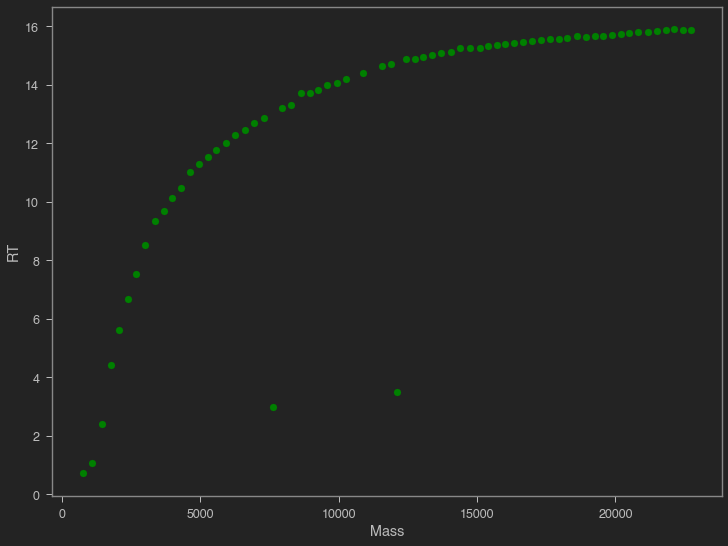

In [1056]:
plt.figure(figsize=(12, 9))
plt.xlabel('Mass')
plt.ylabel('RT')
plt.scatter(df_result.Mass, df_result.RT, color='green')